<a href="https://colab.research.google.com/github/realBagher/Image_Processing_OpenCV/blob/main/CannyEdgeDetection/EdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Canny Edge Detection 

Canny edge detection is a popular image processing technique used to detect edges in images, named after its inventor John F. Canny. It is considered to be one of the most effective edge detection algorithms because it is less sensitive to noise and produces thin and accurate edges.

The canny edge detection algorithm consists of five steps:

1.Smoothing: The image is first smoothed using a Gaussian filter to reduce noise and ensure that only true edges are detected.

2.Gradient computation: The gradient of the image is calculated using the Sobel operator, similar to the Sobel edge detection algorithm. The gradient is computed in both the x and y directions to determine the edge magnitude and direction.

3.Non-maximum suppression: Only the pixels that have maximum gradient values in their local neighborhood are selected as potential edges. This is done to thin out the edges and eliminate spurious responses.

4.Double thresholding: The pixels that are above a high threshold value are considered strong edges, while those below a low threshold value are considered weak edges. Pixels with gradient values between the two thresholds are considered to be in the middle.

5.Edge tracking by hysteresis: Finally, a connectivity analysis is performed to determine the true edges by linking strong edges with weak edges in their vicinity. This is done by following the strong edges and checking if there are any weak edges that can be connected to them.








In [ ]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd 

In [ ]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [ ]:
img = cv2.imread('/content/camera_256.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

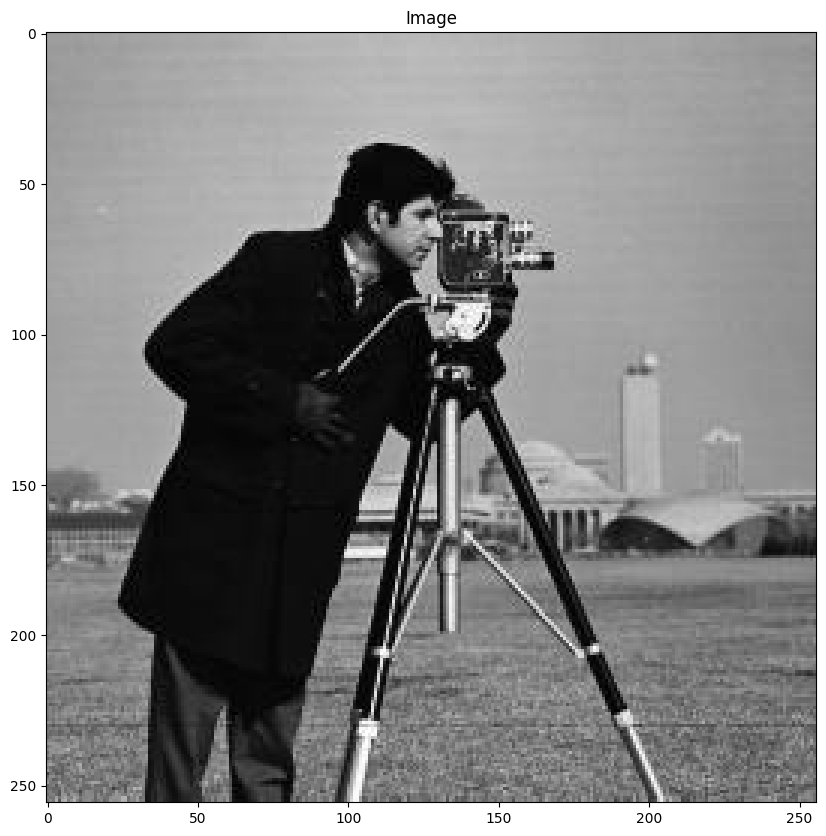

In [ ]:
imshow(image=gray)

In [ ]:
blur = cv2.medianBlur(gray, 5)

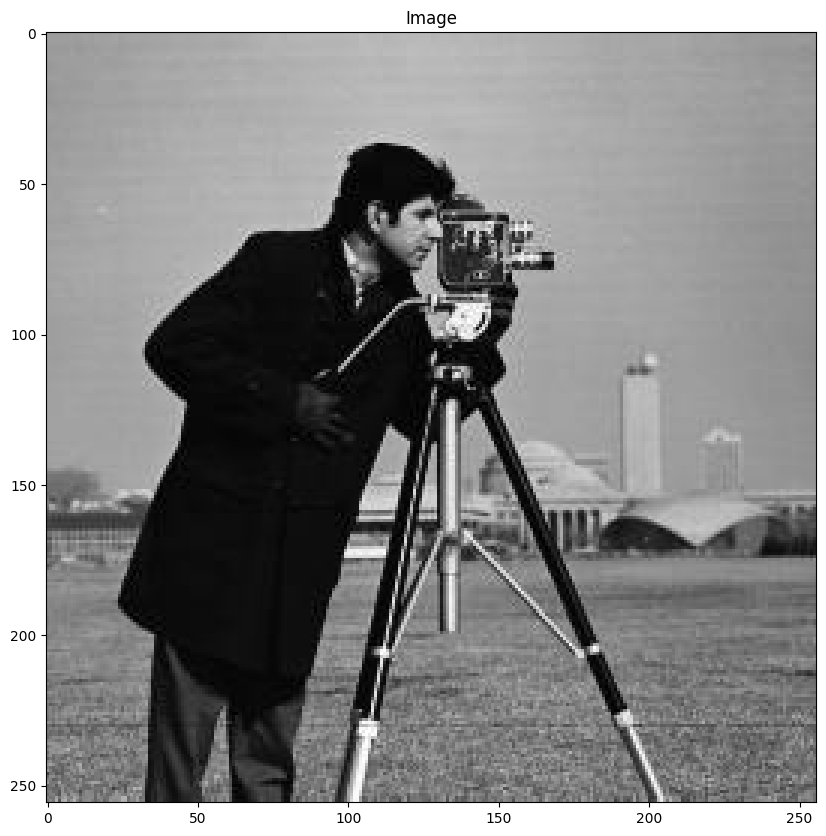

In [ ]:
imshow(image=gray)

In [ ]:
edges = cv2.Canny(blur, 50, 250, apertureSize = 3)

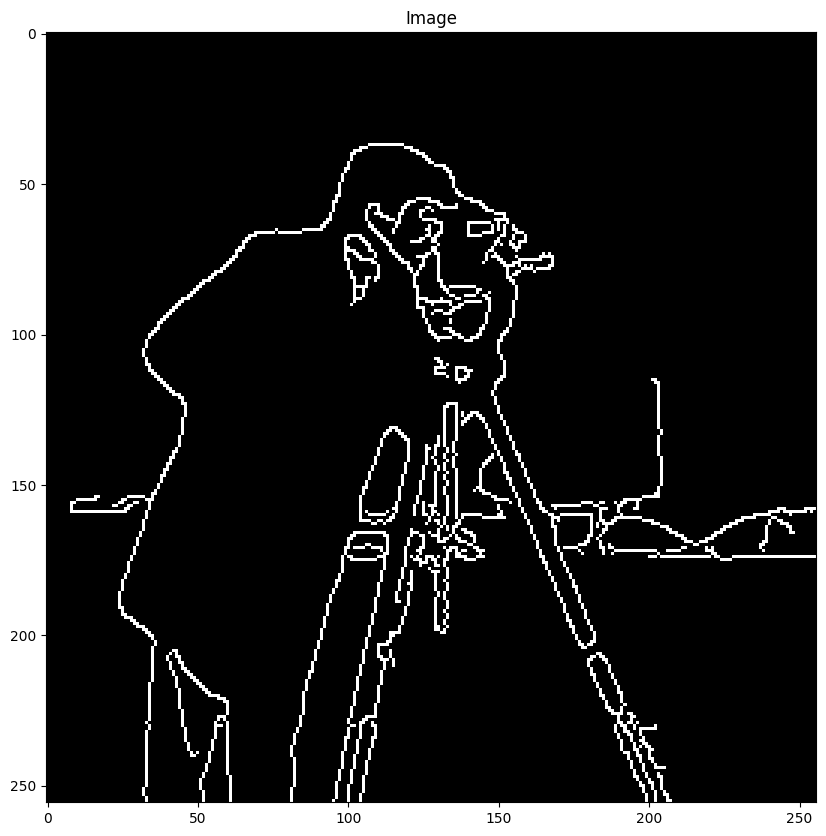

In [ ]:
imshow(image=edges)

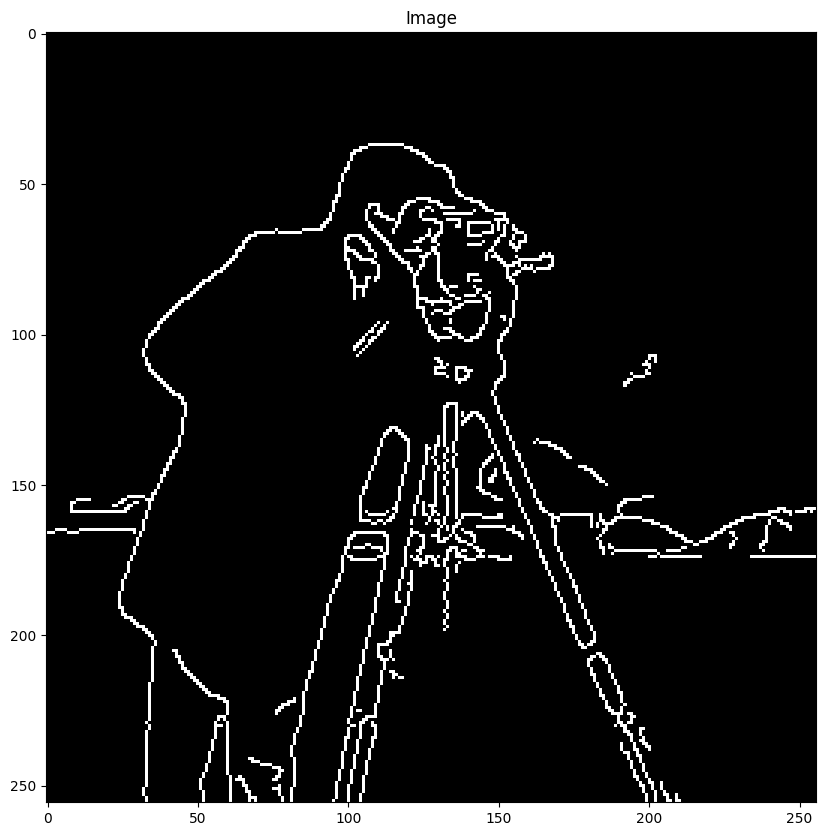

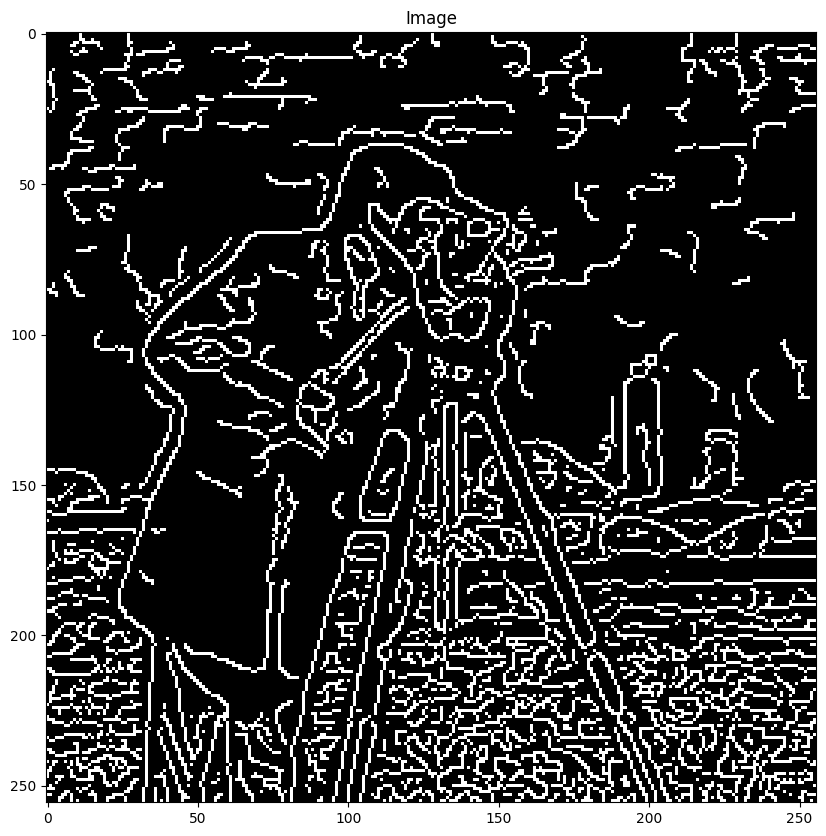

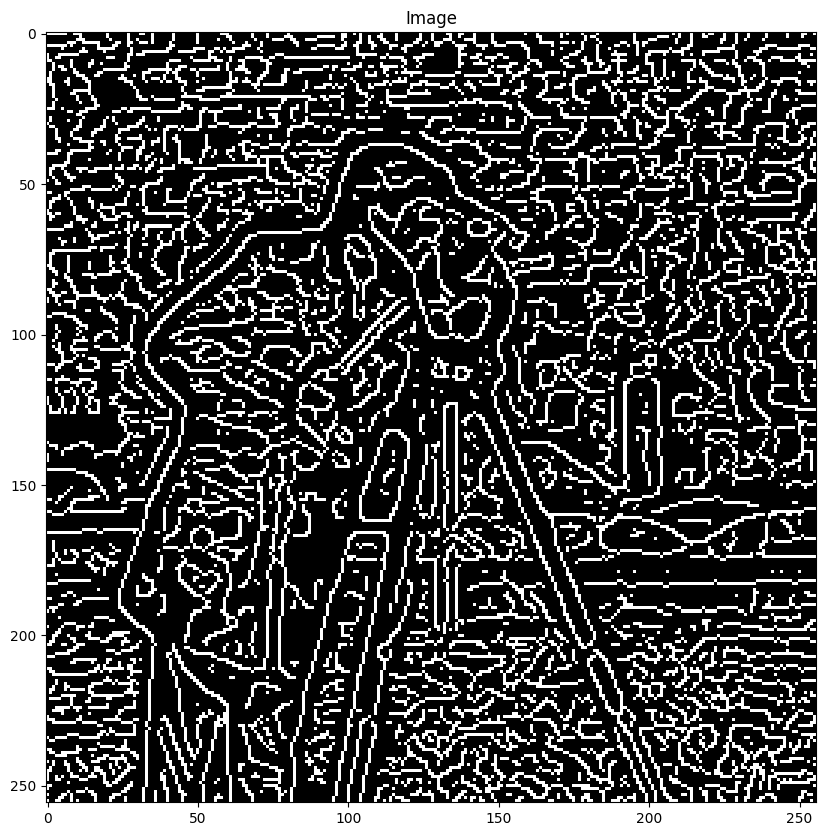

In [ ]:
apperture = [3,5,7]
for i in range(3):
  edges = cv2.Canny(blur, 100, 170, apertureSize = apperture[i])
  imshow(image=edges)

### Sobel Edge Detection 
for kernel sizes of 3,5 and 7

Sobel edge detection is a common image processing technique used to detect edges in images. It works by convolving the image with a small kernel (usually a 3x3 or 5x5 matrix) that emphasizes horizontal and vertical changes in pixel intensity. The Sobel operator uses two kernels, one for detecting horizontal edges and the other for detecting vertical edges.

In [ ]:

def sobel(ksize):

  sobelxy = cv2.Sobel(src=blur, ddepth=-1, dx=1, dy=1, ksize=5)
  return sobelxy 
  


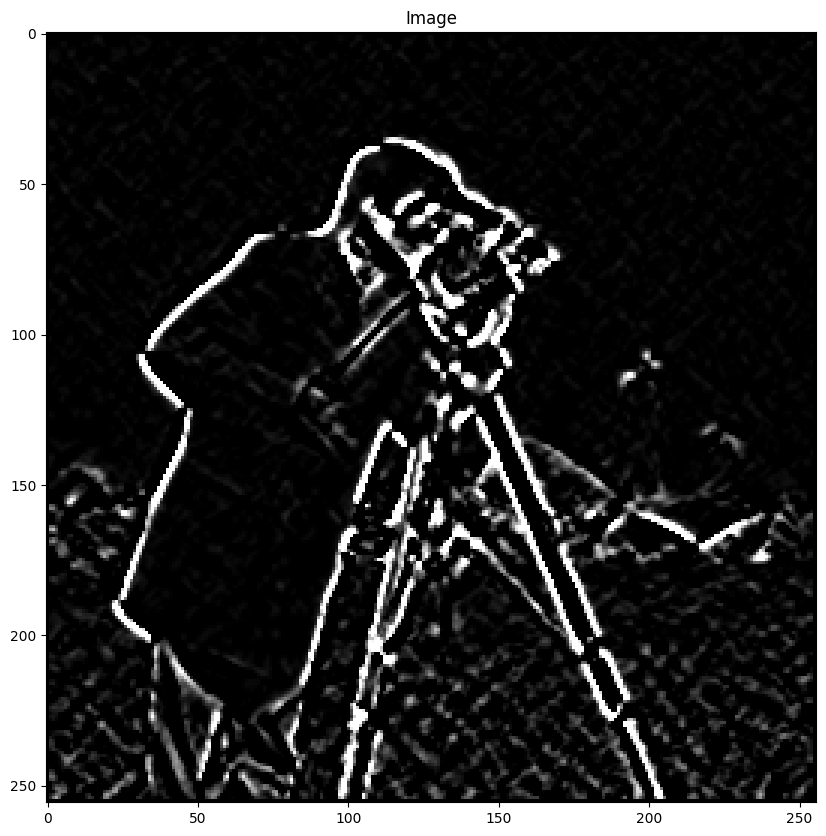

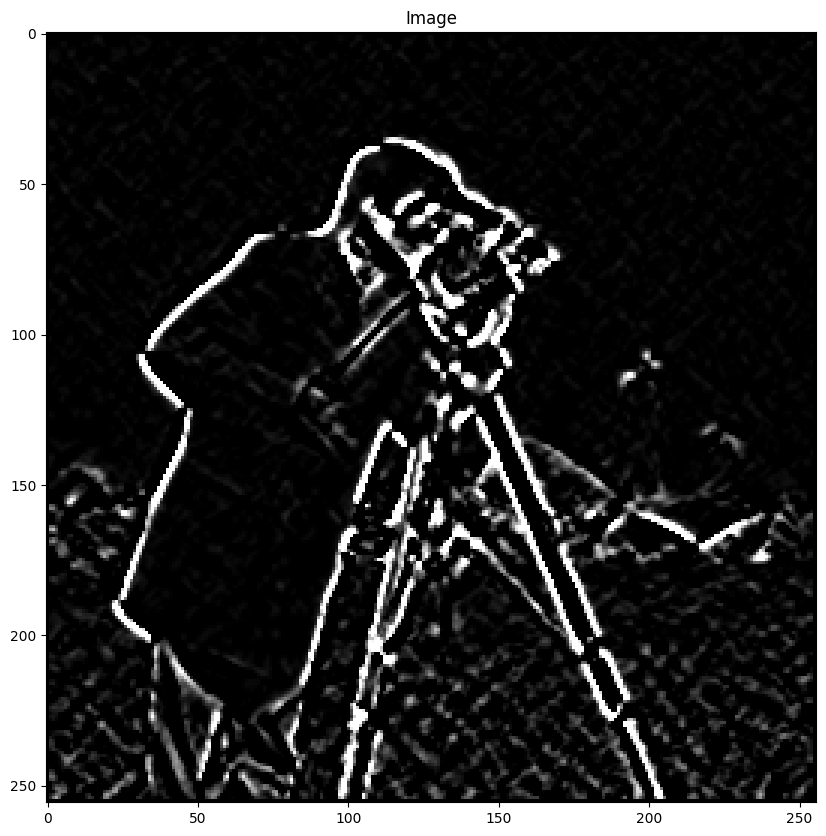

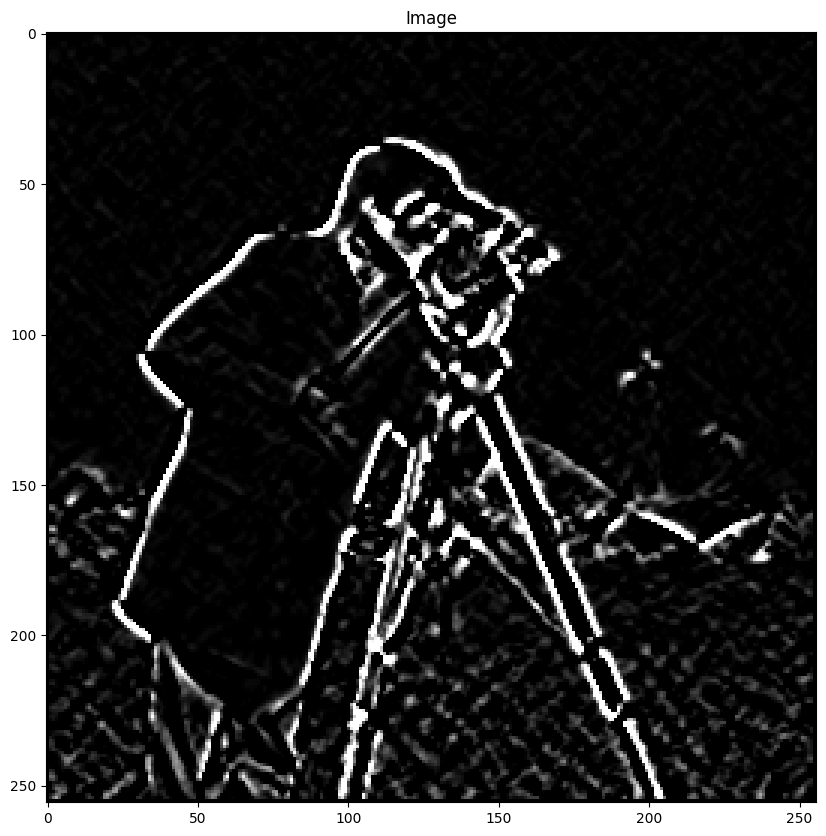

In [ ]:
for i in range(3):
 temp= sobel(apperture[i])
 imshow(image=temp)

### Roberts Filter Edge Detection 

Robert's edge detection is a commonly used technique for detecting edges in digital images. It is a type of spatial filtering that uses two 2x2 convolution masks to calculate the gradient of the image intensity at each pixel.


To apply Robert's edge detection, the masks are centered over each pixel in the image, and the corresponding convolution values are calculated for each mask. The magnitude of the gradient at each pixel is then calculated as the square root of the sum of the squares of the convolution values for both masks.

The result is a new image where the edges are highlighted as areas of high gradient magnitude. The edges detected using Robert's edge detection are thin and may not be as robust as other edge detection techniques, but it is simple and fast to compute.

Robert's edge detection is just one of many edge detection techniques available in computer vision and image processing. Other popular edge detection techniques include Sobel, Prewitt, and Canny edge detection

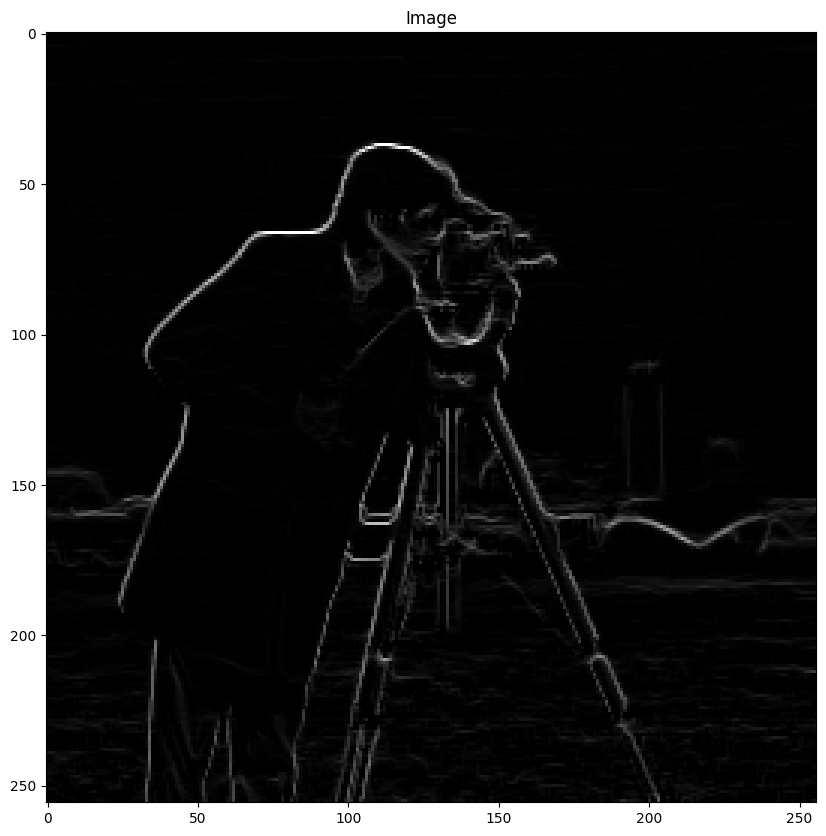

In [ ]:

img = blur

# Define the Roberts filter kernel
kernelx = np.array([[1, 0], [0, -1]])
kernely = np.array([[0, 1], [-1, 0]])

# Apply the Roberts filter using the filter2D function
robertsx = cv2.filter2D(img, -1, kernelx)
robertsy = cv2.filter2D(img, -1, kernely)

# Combine the x and y gradient images
roberts = cv2.add(robertsx, robertsy)

# Display the original and filtered images
imshow(image=roberts)

### Prewitt Filter for Edge Detection 

Prewitt edge detection is a type of image processing algorithm used for edge detection in digital images. It is a simple and effective method for detecting edges in images by calculating the gradient of the image intensity at each pixel.

The Prewitt operator uses a pair of kernels, one for detecting edges in the horizontal direction and another for detecting edges in the vertical direction. Each kernel is a 3x3 matrix of numbers, with the middle row being 0, and the top and bottom rows containing the values -1, 0, and 1.

To apply the Prewitt operator to an image, the two kernels are convolved with the image separately, producing two new images. The edge strength at each pixel is then calculated by taking the magnitude of the gradient vector formed by the two convolved images at that pixel. This magnitude value can be used to threshold the edges in the image.

The Prewitt operator is a simple and fast method for detecting edges in images, but it can produce thick edges and may be sensitive to noise. It is often used as a pre-processing step for other more sophisticated edge detection algorithms.

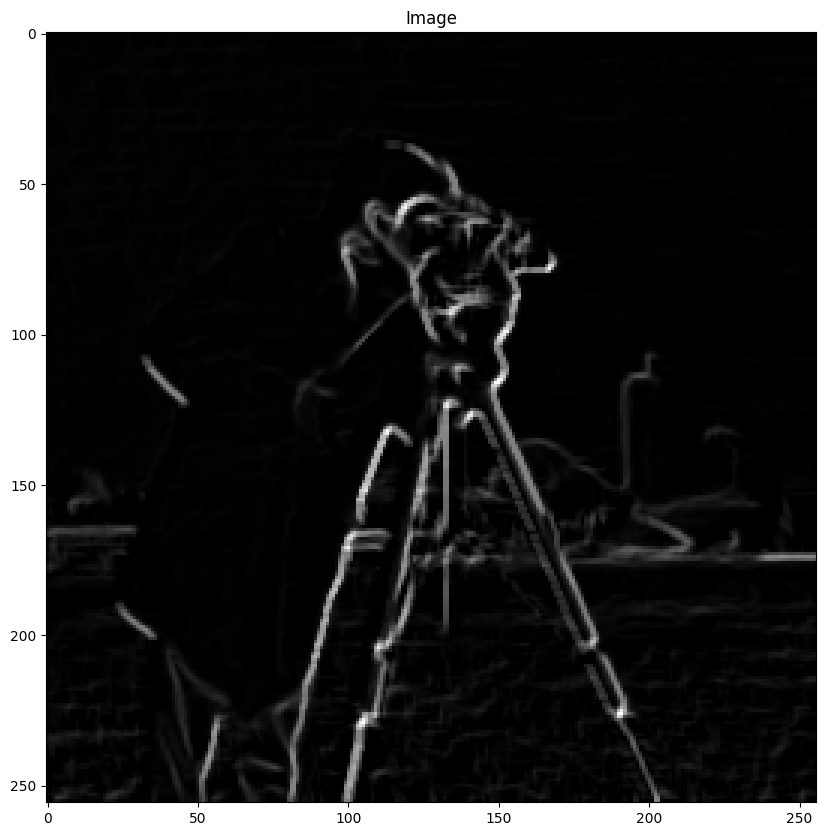

In [ ]:
import cv2
import numpy as np

# Load the image in grayscale

# Define Prewitt kernels
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Apply Prewitt operators on the image
gx = cv2.filter2D(blur, -1, kernel_x)
gy = cv2.filter2D(blur, -1, kernel_y)

# Combine the horizontal and vertical edges
edges = cv2.addWeighted(gx, 0.5, gy, 0.5, 0)

# Display the edges
imshow(image= edges)

